In [8]:
import random
import json
import glob
import numpy as np
import pandas as pd
import selfies as sf
from tqdm import tqdm
from rdkit import Chem
import matplotlib.pyplot as plt

## Perplexities of Aspirin

In [3]:
files = glob.glob("./*ep_1_all_sf_256M*.csv")
files

['./OPT_680M_ep_1_all_sf_256M_2.50E-04_all_sf_valid_100K.csv',
 './OPT_85M_ep_1_all_sf_256M_6.00E-04_all_sf_valid_100K.csv',
 './OPT_302M_ep_1_all_sf_256M_3.00E-04_all_sf_valid_100K.csv',
 './OPT_800K_ep_1_all_sf_256M_1.00E-03_all_sf_valid_100K.csv']

In [4]:
df_dict = {}
model_names = []

for file_name in files:
    model_name_temp= file_name.split("OPT_")[1]
    model_name = model_name_temp.split("_ep")[0]
    model_names.append(model_name)

    df_dict[model_name] = pd.read_csv(file_name, names=["Name",	"Perplexity",	"NLL",	"Probability"], skiprows=1)
    print(len(df_dict[model_name]))

99840
99840
99840
99840


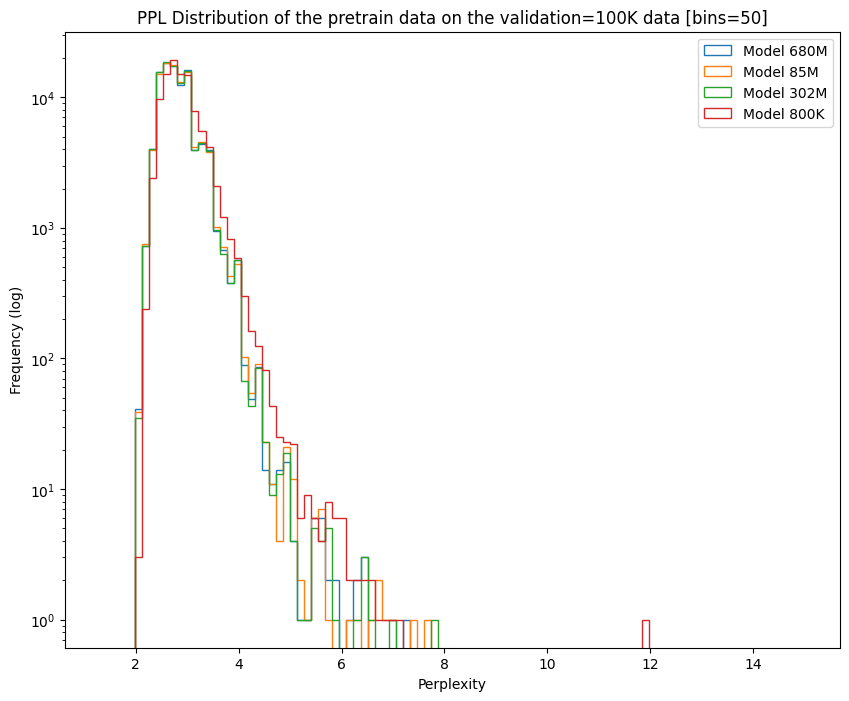

In [15]:
plt.figure(figsize=(10,8))

for model_name in model_names:
    # hist, x = np.histogram(df_dict[model_name]['Perplexity'], density=False, bins=30, range=(1.3,15))
    # plt.plot(x[:-1], hist, label=f"Model {model_name}")
    plt.hist(df_dict[model_name]['Perplexity'], alpha=1, density=False, label=f"Model {model_name}", bins=100, range=(1.3,15), histtype = 'step')
    

plt.xlabel("Perplexity")
plt.ylabel("Frequency (log)")
plt.yscale("log")
plt.title("PPL Distribution of the pretrain data on the validation=100K data [bins=50]");
plt.legend(loc='upper right')

# plt.show()
plt.gcf()
plt.savefig("Model_size_85M_vs_1.2B_PPL.pdf", format="pdf", bbox_inches="tight")

In [6]:
print("Model_size", "Perplexity_mean")
for model_name in model_names:
    mean_ppl = df_dict[model_name]["Perplexity"].mean(axis=0)
    print(model_name, f"{mean_ppl:.4f}")


Model_size Perplexity_mean
680M 2.8065
85M 2.8105
302M 2.8057
800K 2.8920


In [7]:
print("Model_size", "NLL_mean")
for model_name in model_names:
    mean_nll = df_dict[model_name]["NLL"].mean(axis=0)
    print(model_name, f"{mean_nll:.4f}")

Model_size NLL_mean
680M 1.4796
85M 1.4816
302M 1.4793
800K 1.5222


In [38]:
print("Model_size", "Probability_sum")
for model_name in model_names:
    sum_prob = df_dict[model_name]["Probability"].sum(axis=0)
    print(model_name, f"{sum_prob:.1f}")

Model_size Probability_sum
680M 12.8
85M 12.6
302M 11.6
800K 9.8


In [41]:
model_680M_df = pd.read_csv("OPT_680M_ep_1_all_sf_256M_2.50E-04_all_sf_valid_100K.csv", names=["Name",	"Perplexity",	"NLL",	"Probability"], skiprows=1)


In [42]:
model_680M_df.sort_values("Perplexity").tail()

,Name,Perplexity,NLL,Probability
23840,C#CCC(C)C#CC=O,6.2685,2.6481,0.000949
55941,CCCCC(N)=CC=O,6.4188,2.6823,0.000738
76414,N#CC#CCC#CC=CC#N,6.4562,2.6907,0.003239
48691,C#CC=CCON=COC=O,6.4922,2.6987,0.001716
44043,C1#CC#CCC=CC#C1,7.2084,2.8497,0.003657
